
# Problem 1

1) Online learning provides iterating weights quickly. If parallelization is not possible this provides a quick way to explore rapidly. However if you can parralize smallish Minibatch sizes allow for similar benifits with quicker computations.
2)

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

# Device configuration - If you have CUDA configured, you must use it. Try training with CPU and observe what happens
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#Setting a seed for torch
'''step - Your seed will be the last 6 digits of your A# excluding any leading zeros'''
torch.manual_seed(554338) 

In [ ]:
#Check your Current Working Directory
!pwd

In [2]:
#Set Batch Size
'''Step - Set the correct batch size. '''
batch_size = 64


# Download MNIST dataset to local drive. A new folder "data" will be created in the current directory to store data
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader for shuffling and batching.
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)



In [3]:
# Hyper-parameters - We are specifying these apriori
#Network Architecture
input_size = 784
'''Output layer has 10 nodes because we want to predict 10 classes'''
num_classes = 10

#Training Parameters
''' - Define the number of epochs and observe the changes'''
num_epochs = 10


# Fully connected neural network with two hidden layers
class NeuralNet(nn.Module):

    def __init__(self, input_size, h1, h2, num_classes):
        super(NeuralNet, self).__init__()
        '''
        Step - Define the N/w architecture. Use RELU Activation
        '''
        ''' Step - Define a Linear Unit with input size and h1'''
        self.layers = nn.Sequential(
            nn.Linear(input_size, h1),
            nn.ReLU(),
            nn.Linear(h1, h2),
            nn.ReLU(),
            nn.Linear(h2, num_classes),
            nn.Sigmoid()
        )

    def forward(self, x):
        '''
        Step - Forward Propagate through the layers as defined above. Fill in params in place of ...
        '''
        out = self.layers(x)
        return out



# Define the Loss Function and optimizer
'''Step - Define a proper loss function'''

criterion = nn.CrossEntropyLoss().to(device)


In [4]:
# Train the model
'''step - choose different learning rates and store them in a list and observe the changes '''
learning_rates = [.01, .1, .25]
'''Vary this number and observe the changes, define a list of possible values'''
hidden_sizes = [400, 500, 600, 700, 800]

for h1 in hidden_sizes:
    for learning_rate in learning_rates:
        h2 = h1
        total_step = len(train_loader)
        #Define the Model Object and your optimizer
        model = NeuralNet(input_size=input_size, h1=h1, h2=h2, num_classes=num_classes).to(device)
        optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
        for epoch in range(num_epochs):
            for i, (images, labels) in enumerate(train_loader):  
                # Move tensors to the configured device
                images = images.reshape(-1, 28*28).to(device)
                labels = nn.functional.one_hot(input=labels, num_classes=num_classes).float().to(device)

                # Forward pass
                '''Step - Get Network outputs with forward propagation with current network weights'''
                outputs = model(images)
                '''Step - Get Loss by comparing outputs with True Labels after forward propagation'''
                loss = criterion(outputs, labels).to(device)

                # Backward and optimize

                '''Step - ... below needs to be replaced with functions'''
                '''Step - clear the gradients after each pass - Strongly recommended'''
                optimizer.zero_grad()
                '''Backpropagate the Loss to calculate gradient for each weight'''
                loss.backward() 
                '''Update the weight using the learning rate'''
                optimizer.step() 
                #Print Progress every 100 steps
                if (i+1) % 300 == 0:
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        with torch.no_grad(): # In test phase, we don't need to compute gradients (for memory efficiency)
            correct = 0
            total = 0
            for images, labels in test_loader:
                
                '''Step - Move images to device after appropriate reshaping'''

                '''Step  - Move labels to device'''
                labels = labels.to(device)
                images = images.reshape(-1, 28*28).float().to(device)
                #get network outputs
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

            print(f'Accuracy of the network on the 10000 test images: {(100 * correct / total)} %, with learning rate: {learning_rate}, and {h1} hidden neurons 1 and {h2} hidden neurons 2')

Epoch [1/10], Step [300/938], Loss: 2.2935
Epoch [1/10], Step [600/938], Loss: 2.2858
Epoch [1/10], Step [900/938], Loss: 2.2700
Epoch [2/10], Step [300/938], Loss: 2.2461
Epoch [2/10], Step [600/938], Loss: 2.2094
Epoch [2/10], Step [900/938], Loss: 2.1521
Epoch [3/10], Step [300/938], Loss: 2.0423
Epoch [3/10], Step [600/938], Loss: 1.9702
Epoch [3/10], Step [900/938], Loss: 1.8716
Epoch [4/10], Step [300/938], Loss: 1.8343
Epoch [4/10], Step [600/938], Loss: 1.8365
Epoch [4/10], Step [900/938], Loss: 1.7850
Epoch [5/10], Step [300/938], Loss: 1.7242
Epoch [5/10], Step [600/938], Loss: 1.7471
Epoch [5/10], Step [900/938], Loss: 1.7268
Epoch [6/10], Step [300/938], Loss: 1.7296
Epoch [6/10], Step [600/938], Loss: 1.6745
Epoch [6/10], Step [900/938], Loss: 1.7241
Epoch [7/10], Step [300/938], Loss: 1.7115
Epoch [7/10], Step [600/938], Loss: 1.6735
Epoch [7/10], Step [900/938], Loss: 1.6571
Epoch [8/10], Step [300/938], Loss: 1.6488
Epoch [8/10], Step [600/938], Loss: 1.6750
Epoch [8/10

In [ ]:
# Save the model checkpoint for future use
torch.save(model.state_dict(), 'model.ckpt')


The accuracy of the neural network was found to be 96.96 percent with with learning rate: 0.25, and 800 hidden neurons 1 and 800 hidden neurons 2. This was the best result found.
# Problem 2

1)

$$\delta^L = 
\begin{bmatrix}
\sigma'(z_1^L) & 0 & \cdots & 0 \\
0 & \sigma'(z_2^L) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma'(z_{n_l}^L)
\end{bmatrix}
\begin{bmatrix}
\frac{\partial C}{\partial a_1^L} \\
\frac{\partial C}{\partial a_2^L} \\
\vdots \\
\frac{\partial C}{\partial a_{n_l}^L}
\end{bmatrix}
= 
\begin{bmatrix}
\sigma'(z_1^L) \frac{\partial C}{\partial a_1^L} \\
\sigma'(z_2^L) \frac{\partial C}{\partial a_2^L} \\
\vdots \\
\sigma'(z_{n_l}^L) \frac{\partial C}{\partial a_{n_l}^L}
\end{bmatrix}
$$
This shows that a hattamar product is the same as multiplying a diagonal matrix by a vector. 

2)

$$\delta^l = 
\begin{bmatrix}
\sigma'(z_1^l) & 0 & \cdots & 0 \\
0 & \sigma'(z_2^l) & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & \sigma'(z_{n_l}^l)
\end{bmatrix}
\cdot
\begin{bmatrix}
w_{1,1}^{l+1} & w_{1,2}^{l+1} & \cdots & w_{1,n_{l-1}}^l \\
w_{2,1}^{l+1} & w_{2,2}^{l+1} & \cdots & w_{2,n_{l-1}}^{l+1} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1}^{l+1} & w_{n_l,2}^{l+1} & \cdots & w_{n_l,n_{l-1}}^{l+1}
\end{bmatrix}
^T \cdot
\begin{bmatrix}
\delta^{l+1}_1 \\
\delta^{l+1}_2 \\
\vdots \\
\delta^{l+1}_{n_l}
\end{bmatrix}
= 
\begin{bmatrix}
\sigma'(z_1^l) \sum_{j=1}^{n_l} w_{j,1}^{l+1} \delta_j^{l+1} \\
\vdots \\
\sigma'(z_{n_l}^l) \sum_{j=1}^{n_l} w_{j,n_l}^{l+1} \delta_j^{l+1}
\end{bmatrix}
$$

3) 

The definition in 2.2 provides a definition for the l+1 layer so for the final layer if we sub 1 in to be in the final layer we get:

$$
\delta^1 =
\sum'(z^1)(w^2)^T\sum'(z^2)(w^3)^T  \cdots \sum'(z^{L-1})(w^L)\sum'(z^L)\frac{\partial C}{\partial a^L}
$$

4)

If the activation function just returns itself the derivative term $\sigma'(z) = 1$ for all terms. 
The first rule would then be written as:
$$
\delta^L =
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
\frac{\partial C}{\partial a_1^L} \\
\frac{\partial C}{\partial a_2^L} \\
\vdots \\
\frac{\partial C}{\partial a_{n_l}^L}
\end{bmatrix}
=
\begin{bmatrix}
\frac{\partial C}{\partial a_1^L} \\
\frac{\partial C}{\partial a_2^L} \\
\vdots \\
\frac{\partial C}{\partial a_{n_l}^L}
\end{bmatrix}
$$
The second rule could then be rewritten as:
$$delta^l = 
\begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 1
\end{bmatrix}
\cdot
\begin{bmatrix}
w_{1,1}^{l+1} & w_{1,2}^{l+1} & \cdots & w_{1,n_{l-1}}^l \\
w_{2,1}^{l+1} & w_{2,2}^{l+1} & \cdots & w_{2,n_{l-1}}^{l+1} \\
\vdots & \vdots & \ddots & \vdots \\
w_{n_l,1}^{l+1} & w_{n_l,2}^{l+1} & \cdots & w_{n_l,n_{l-1}}^{l+1}
\end{bmatrix}
^T \cdot
\begin{bmatrix}
\delta^{l+1}_1 \\
\delta^{l+1}_2 \\
\vdots \\
\delta^{l+1}_{n_l}
\end{bmatrix}
=
\begin{bmatrix}
\sum_{j=1}^{n_l} w_{j,1}^{l+1} \delta_j^{l+1} \\
\vdots \\
\sum_{j=1}^{n_l} w_{j,n_l}^{l+1} \delta_j^{l+1}
\end{bmatrix}
$$
The third rule could then be rewritten as:
$$\frac{\partial C}{\partial b^l} = \frac{\partial C}{\partial a}\frac{\partial a}{\partial z} \frac{\partial z}{\partial b}$$
This middle term since a is z the middle term drops
$$ = \frac{\partial C}{\partial a} \frac{\partial z}{\partial b}$$
And since b is a constant the last term drops
$$ = \frac{\partial C}{\partial a} = \delta_j^l$$
For the final rule we get
$$\frac{\partial C}{\partial w^l} = \frac{\partial C}{\partial a}\frac{\partial a}{\partial z} \frac{\partial z}{\partial w} = z^{l-1}\delta_j^l$$
Backprop algorithm can be rewritten as:
$$\delta^1 =
(w^2)^T(w^3)^T  \cdots (w^L)^T\frac{\partial C}{\partial a^L}$$


# Problem 3

1) 

$$a\ln(0) + (1-a)\ln(1-0) = \text{ undefined}$$
When the activation function is a sigmoid a will never be the zero vector so this does not affect the first expression.

2) 

$$-E_{x,y~\hat{P}_{data}}\log P_{model}(y|P(y=1|x,\theta))$$
The expectaion operator retruns the mean of the distribution and y in this case is your $\hat{y}$ and x is your true y. So this results in the following:
$$-\frac{1}{n}\sum\hat{P}_{data}\log(y^{\hat{y}}(1-\hat{y}))$$
Your output of your model is the probability of y being 1 so the following is true:
$$\hat{y} = P(y=1|x,\theta)$$
$$1-\hat{y} = P(y=0|x,\theta)$$
$$\frac{1}{n}\sum\log(\hat{y}^{y}(1-\hat{y})^{1-y})$$
$$\frac{1}{n}\sum\log(\hat{y}^{y})+\log((1-y)^{1-y})$$
$$\frac{1}{n}\sum\log(\hat{y})+(1-y)\log((1-\hat{y}))$$

3) 
For a multinolli the inner product is over the classes and the outer sum is over the number of datapoints.
$$\frac{1}{n}\sum_{i=1}^n\log{\Pi_{j=1, i}^K \hat{y_j}^{y_j}}$$

$$\frac{1}{N}\sum^{N}_{i=1} \sum^{K}_{j=1}y_j\log{\hat{(y_j)}}$$
Y will only be 1 for the correct class so the following is true:
$$\frac{1}{N}\sum^{N}_{i=1} y_j\log{\hat{(y_j)}}: y_j = 1$$

4)

If the activation is equal to the true value the following equation results

$$-\frac{1}{n}\sum_{i=1}^n y_i\ln(y) + (1-y)\ln(1-y)$$
In the case of bernolli y = 1 when there is a success so 
$$-\frac{1}{n}\sum_{i=1}^n 1\ln(1) + (1-1)\ln(1-y)$$
The resulting value is zero so it is minimized when the activation is equal to the true value. This can be seen in the following surface.
If we take the derivative of the equation we get the following:
$$\frac{\partial C}{\partial a} = \sum \frac{y}{a} - \frac{1-y}{1-a}$$
To minimize this we set it equal to zero and solve for a:
$$\sum \frac{y}{a} - \frac{1-y}{1-a} = 0$$
Taking the partial with respect to a single at a single term we get:
$$\frac{y}{a} = \frac{1-y}{1-a}$$
$$y - ya = a - ay$$
$$y = a$$

Taking the hessian we get:

$$\dfrac{y}{a^2}-\dfrac{1-y}{\left(1-a\right)^2}$$
Since a and y are both between 0 and 1 the hessian is always positive so when y = a it is a minimum.

This can be shown with the following plot.

/tmp/ipykernel_2825/3742202436.py:7: RuntimeWarning: divide by zero encountered in log
  w = - y*np.log(x) - (1-y)*np.log(1-x)
/tmp/ipykernel_2825/3742202436.py:7: RuntimeWarning: invalid value encountered in multiply
  w = - y*np.log(x) - (1-y)*np.log(1-x)
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1188: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/numpy/core/numeric.py:1647: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/numpy/core/numeric.py:1650: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
/home/tim/code/machine_learning/stats6685/venv/lib/python3.10/site-packages/numpy/core/numeric.py:1651: RuntimeWarning: invalid value encountered in multiply
  mult

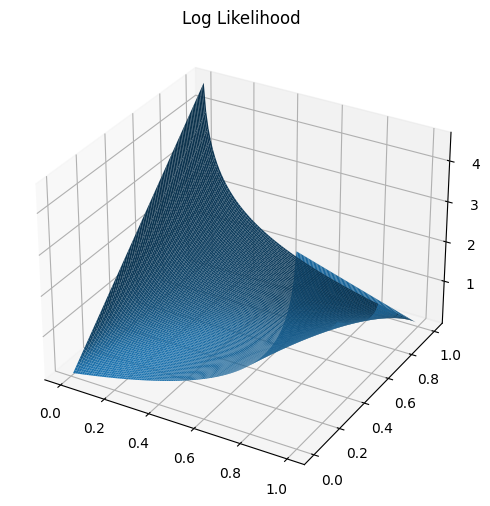

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x_linspace = np.linspace(0, 1, 100)
y_linspace = np.linspace(0, 1, 100)
def log_likelihood(x, y):
    w = - y*np.log(x) - (1-y)*np.log(1-x)
    return w

# create a meshgrid
X, Y = np.meshgrid(x_linspace, y_linspace)
# calculate Z
Z = log_likelihood(X, Y)

# plot the surface
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')
plt.title('Log Likelihood')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1)
plt.show()
print()

5)

The softmax is called softmax because it is a differentiable approximation of the max function. 

6)
If the log likelihood is defined as 
$$f(a^L_k) = -\ln{a^L_k}$$
Then the derivative when a is the softmax is 
$$\frac{\partial f^L_y}{\partial a^L_k} = 
\begin{cases}
-\frac{1}{a^L_k}& y==k \\
 0 & otherwise
 \end{cases}$$
The derivative of the softmax is
$$\frac{\partial a^L_p}{\partial z^L_k} = 
\begin{cases}
a^L_k(1-a^L_k) &  k=p\\
  -a_k^L a_j^L & otherwise
 \end{cases}$$ 
putting these together we get
and letting softmax be defined as S
$$
\frac{\partial f^L_p}{\partial z^L_1} \begin{cases}
 a_j^L -1 &  j = p \\ 
 a_j^L & otherwise 
 \end{cases}$$
This can be written as $a_j^l - y$ because y should only be equal to 1 when j = p and 0 otherwise. 




# Problem 4

1) 

derivative with respect to the first term in the summation 

$$y_i\cdot x_i(1+\exp(-\bar{w}^T\bar{x}_i))\cdot \frac{\exp(-w^Tx_i)}{(1+\exp(-\bar{w}^T\bar{x}_i))^2}$$
$$y_i\cdot x_i\cdot \frac{\exp(-w^Tx_i)}{(1+\exp(-\bar{w}^T\bar{x}_i))}$$
derivative with respect to the second term in the summation

$$x(1-y_i)\frac{1+\exp(-w^Tx_i)}{\exp(-w^Tx_i)}(\dfrac{\exp(-2w^Tx)}{\left(\exp{-w^Tx}+1\right)^2}-\dfrac{\exp{-w^Tx}}{\exp{-w^Tx}+1})$$
$$x(1-y_i)\frac{1}{\exp(-w^Tx_i)}(\dfrac{\exp(-2w^Tx)}{\left(\exp{-w^Tx}+1\right)}-\exp{-w^Tx})$$
$$x(1-y_i)(\dfrac{\exp{-w^Tx}}{\left(\exp(-w^Tx)+1\right)}-1)$$


derivative of the regularization term
this is with respect to W not $\bar{w}$ so Introducing a term $B = [I_{n x n}, 0_{n x 1}]$ we can write the regularization term as 
$$\lambda w^Tw$$


Putting it together we get

$$-\frac{1}{n}\sum_{i=1}^n x_i(y_i \frac{\exp(-w^Tx_i)}{(1+\exp(-\bar{w}^T\bar{x}_i))} + (1-y_i)(\dfrac{\exp(-w^Tx)}{\left(\exp(-w^Tx)+1\right)}-1)) + 2\lambda w$$
$$-\frac{1}{n}\sum_{i=1}^n x_i(y_i\frac{\exp(-w^Tx_i)}{(1+\exp(-\bar{w}^T\bar{x}_i))} + \dfrac{\exp(-w^Tx)}{\left(\exp(-w^Tx)+1\right)}-1-y_i\dfrac{\exp(-w^Tx)}{\left(\exp(-w^Tx)+1\right)}-y_i) + 2\lambda w$$
$$-\frac{1}{n}\sum_{i=1}^n x_i(-1 + y_i + \dfrac{\exp(-w^Tx)}{\left(\exp(-w^Tx)+1\right)}) + 2\lambda w$$
If we take the gradient with respect to the offset the final term does not contain the offset so it is zero. 
so \\
$$-\frac{1}{n}\sum_{i=1}^n [y_i - \frac{1}{1+e^{-w^Tx}}]x_i $$

In [22]:
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
# class CustomLoss(nn.Module):
#     def __init__(self, lamb) -> None:
#         super().__init__()
#         self.cross_entropy = nn.NLLLoss().to(device)
#         self.lamb = lamb

#     def forward(self, output, expected_output, w):
#         # exp_z = torch.exp(-x_hat @ w.T)
#         # plus_exp_z = 1 + exp_z
#         # y = y.T
#         # first_term = y @ torch.log(1 / (plus_exp_z))
#         # second_term = (1 - y) @ torch.log(1 - (exp_z / (plus_exp_z)))
#         cross_entropy = self.cross_entropy(output, expected_output).float().to(device)
#         third_term = (self.lamb * torch.norm(w, p=2)**2).float().to(device)
#         loss = (cross_entropy + third_term).float().to(device)
#         print(loss)
#         # loss = -1/len(output) * (first_term + second_term) + third_term
#         return loss
#Load Mini MNIST from the MATLAB data file - Observe how we load the files

mnist = loadmat('mnist_49_3000.mat')
X = mnist['x']
y = mnist['y'][0]

'''
Test Train Split for Calculating accuracy on a Held Out Test Dataset.
'''
X_train, X_test, y_train, y_test = train_test_split(X.T, y, test_size=1/3, random_state=42)
# for i in range(10):
#     plt.imshow(X_train[i].reshape(28, 28))
#     plt.show()


def converter(inp):
    if inp > 0:
        return 1
    else:
        return 0


y_train_mod = [converter(val) for val in y_train]
print(y_train_mod[0:10])
y_test_mod  = [converter(val) for val in y_test]

# for i in range(10):
#     plt.imshow(X_test[i].reshape(28, 28))
#     plt.show()
print(y_test_mod[0:10])

train_dataset = torch.utils.data.TensorDataset(torch.tensor(X_train), torch.tensor(y_train_mod))
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test), torch.tensor(y_test_mod))
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=40, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=20, shuffle=False)



#We need to change -1 to 0 before fitting logistic regression.

# create a dataset for training 

print(y_train_mod[0:10])

class LinearReg_module(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 1, bias=True),
            nn.Sigmoid()
        )
    def forward(self, x):
        output = self.layers.forward(x)
        return output 
    
class LogisticRegression():
    def __init__(self, 
                input_dim,
                 n_epochs = 1000,
                lr = .01, 
                lamb = 1):
        self.input_dim = input_dim
        self.n_epochs = n_epochs
        self.lamb = lamb
        self.lr = lr
       
        self.module = LinearReg_module(input_dim).to(device)
        
    def fit(self):
        '''*** Define the loss ***
        '''
        loss_func = nn.BCELoss()
        '''*** Define the optimizer SGD ***'''
        optimizer = torch.optim.SGD(self.module.parameters(), lr=self.lr, weight_decay=self.lamb)
        for epoch in range(self.n_epochs):
            for i, (images, labels) in enumerate(train_loader):
                images, labels = images.float().to(device), labels.float().reshape(-1, 1).to(device)
                # forward pass
                y_hat = self.module(images)
                # compute loss
                loss = loss_func(y_hat, labels)
                optimizer.zero_grad()
                # backpropagation
                loss.backward()
                # update parameters
                optimizer.step() 
            if epoch % 100 == 0:
                print(f'Epoch {epoch} loss: {loss.item():.4f}')

    def predict(self, x):
        self.module.eval()
        x = torch.tensor(x).float().to(device)
        y_hat = self.module(x)
        return y_hat.detach().cpu().numpy()



model = LogisticRegression(input_dim = input_size, lamb = 1) 
model.fit() 
#Generate Predictions
preds = model.predict(X_test) 
print(preds.shape)
y_test_mod = np.array(y_test_mod).reshape(-1, 1)
print(y_test_mod.shape)
print(preds[0:10])
print(f"The accuracy with lambda = 1 is {(np.abs(preds - y_test_mod) < .5).mean()}")

model = LogisticRegression(input_dim = input_size, lamb = .01) 
model.fit() 
#Generate Predictions
preds = model.predict(X_test) 
print(preds.shape)
y_test_mod = np.array(y_test_mod).reshape(-1, 1)
print(y_test_mod.shape)
print(preds[0:10])

# check how many were within a .05 margin of error
print(f"The accuracy with lambda = .01 is {(np.abs(preds - y_test_mod) < .5).mean()}")
# check how many were within a .05 margin of error




[1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[1, 1, 1, 1, 0, 1, 1, 1, 0, 0]
Epoch 0 loss: 0.5480
Epoch 100 loss: 0.5015
Epoch 200 loss: 0.4739
Epoch 300 loss: 0.4947
Epoch 400 loss: 0.5232
Epoch 500 loss: 0.5823
Epoch 600 loss: 0.4861
Epoch 700 loss: 0.4935
Epoch 800 loss: 0.4692
Epoch 900 loss: 0.4815
(1000, 1)
(1000, 1)
[[0.3425441 ]
 [0.34937564]
 [0.34581986]
 [0.49805543]
 [0.34616986]
 [0.47795483]
 [0.2917935 ]
 [0.61795247]
 [0.46261933]
 [0.43660337]]
The accuracy with lambda = 1 is 0.894
Epoch 0 loss: 0.5333
Epoch 100 loss: 0.0948
Epoch 200 loss: 0.0995
Epoch 300 loss: 0.0692
Epoch 400 loss: 0.1131
Epoch 500 loss: 0.1027
Epoch 600 loss: 0.1692
Epoch 700 loss: 0.1570
Epoch 800 loss: 0.0881
Epoch 900 loss: 0.1402
(1000, 1)
(1000, 1)
[[0.01416852]
 [0.00372397]
 [0.03063104]
 [0.13502438]
 [0.16793548]
 [0.24133123]
 [0.01382926]
 [0.87811244]
 [0.1228999 ]
 [0.26784098]]
The accuracy with lambda = .01 is 0.972


In [23]:
loss = nn.BCELoss()
mean_loss = loss(torch.tensor(preds).float(), torch.tensor(y_test_mod).float())
print(f"The mean loss is {mean_loss}")

The mean loss is 0.11454205960035324


The test error for both .01 is .972 the test error for both 1 is .908. I initialized the weight and offsets with the default values from pytorch. 

(1000, 1)
20


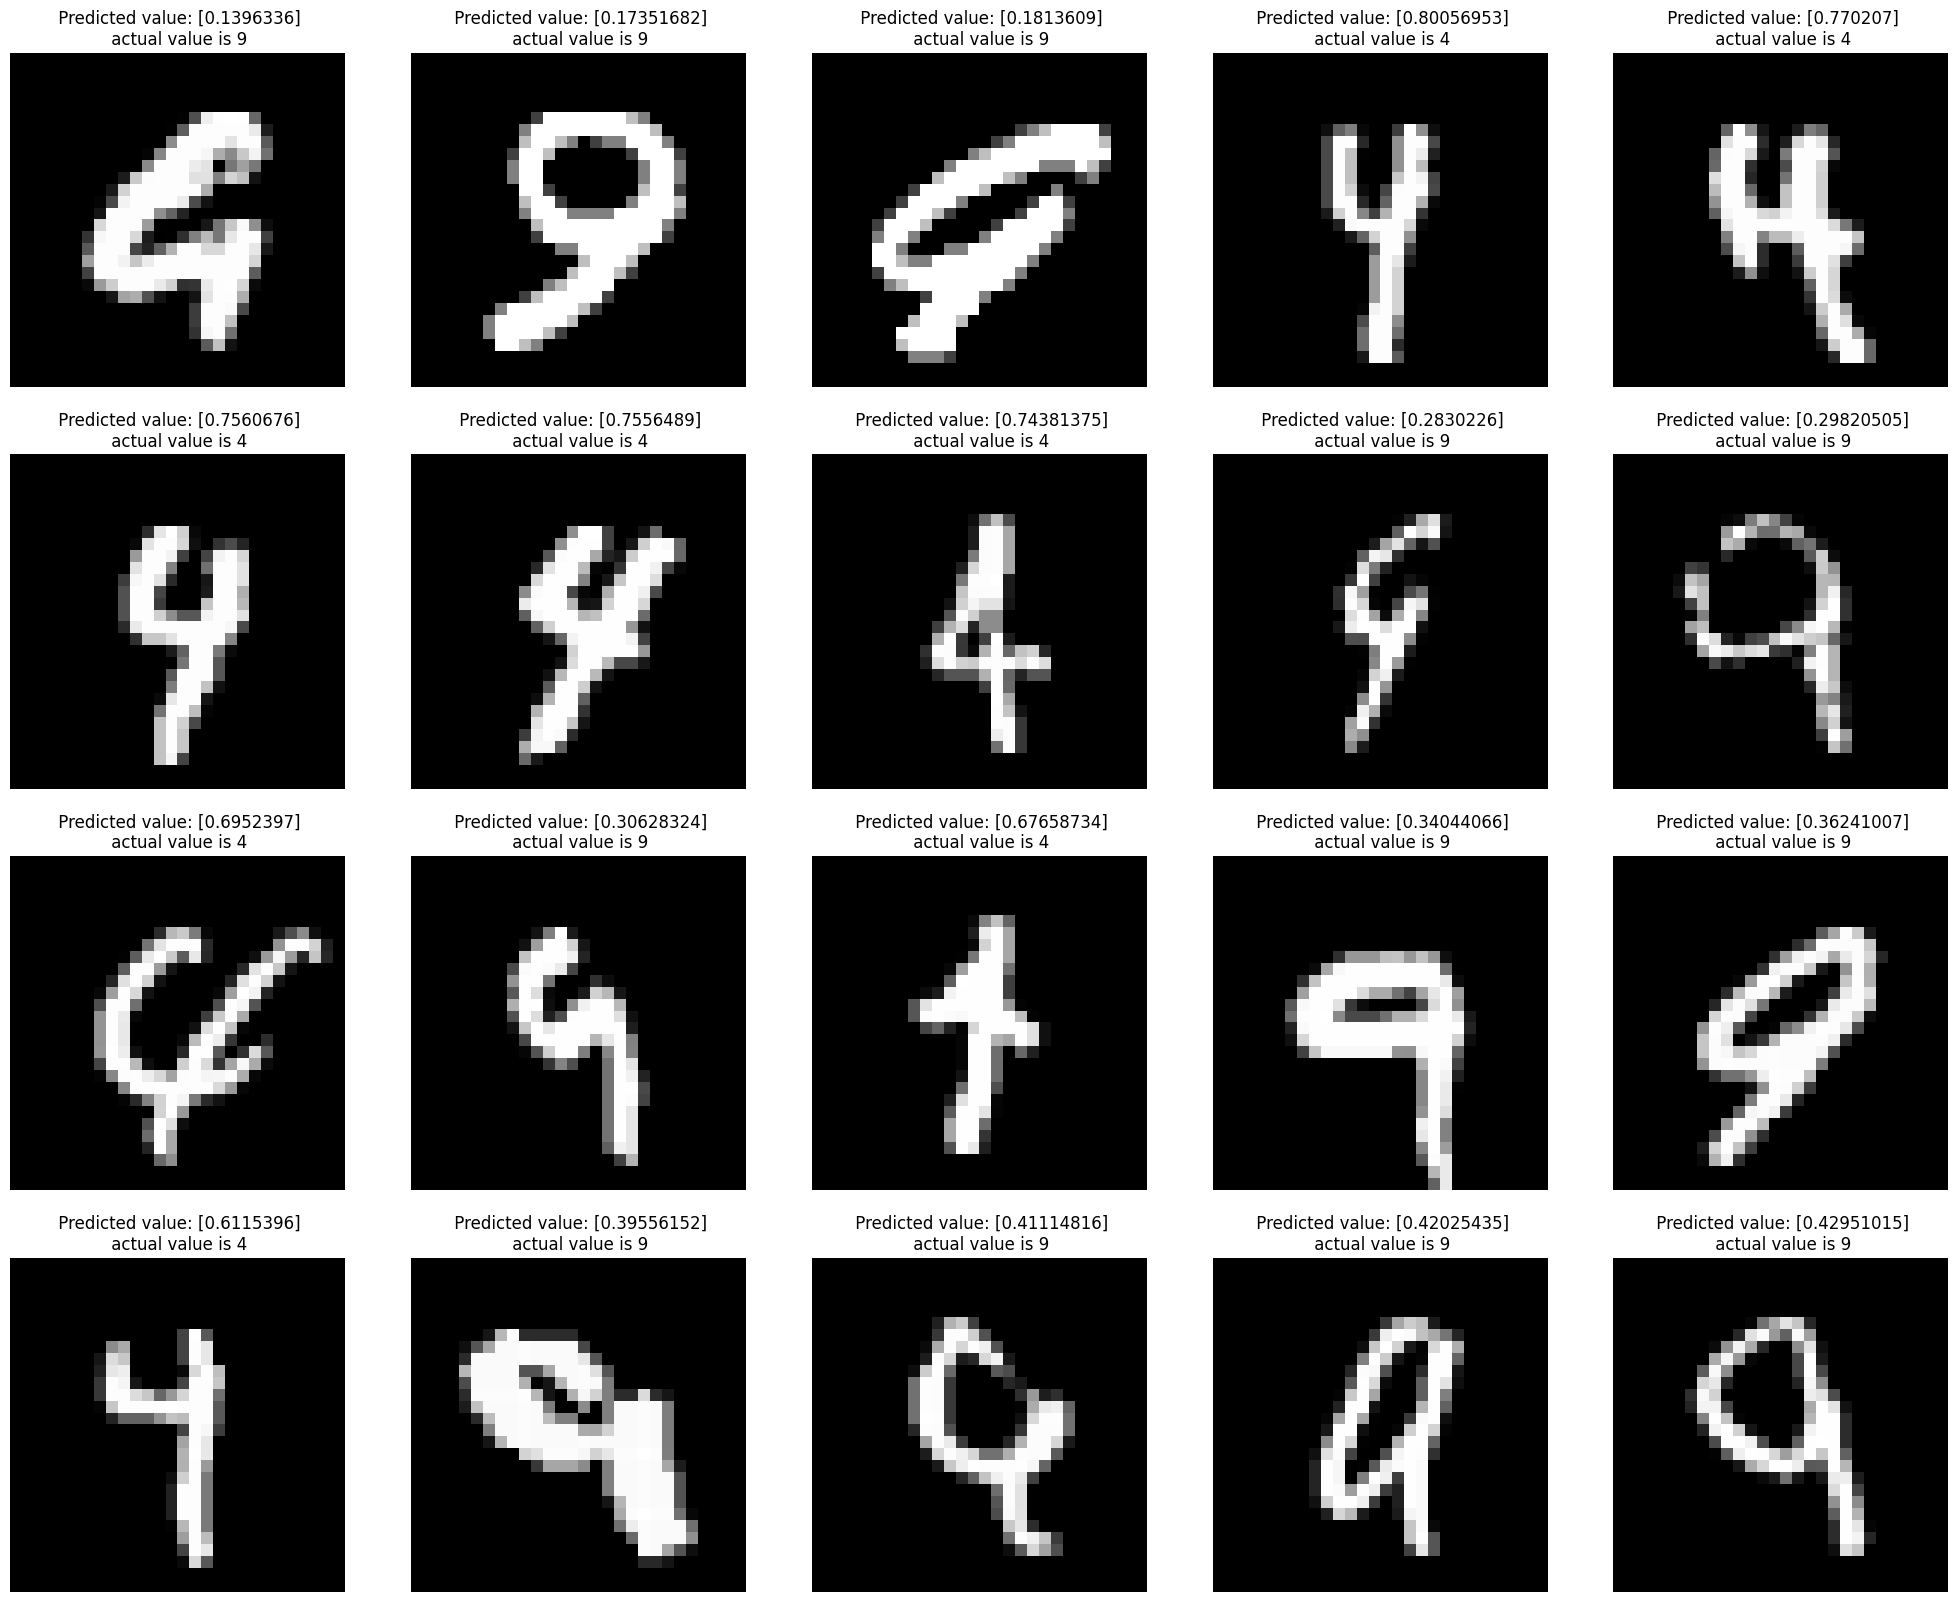

In [39]:

# Assuming you have 'preds', 'y_test_mod', and 'x_test_wrong' defined earlier
print(preds.shape)
diff = preds - y_test_mod
transformed_confidence = []
indexes = []
i = 0
for prediction, true in zip(preds, y_test_mod):
    if np.abs(prediction - true) > .5:
        transformed_confidence.append((min(prediction, 1 - prediction), i))
    i += 1

sorted_confidence  = sorted(transformed_confidence, key=lambda x: x[0])
twenty_smallest = sorted_confidence[0:20]
print(len(twenty_smallest))

fig, axs = plt.subplots(4, 5, figsize=(25, 20)) 
row, column = 0, 0
for i in twenty_smallest:
    if column > 4:
        row += 1
        column = 0
    current_axs = axs[row][column]
    confidence = i[0]
    index = i[1]
    current_axs.imshow(X_test[index].reshape(28, 28), cmap='gray')
    correct_label = 9 if preds[index] < .5  else 4
    current_axs.set_title(f" Predicted value: {preds[index]}\n actual value is {correct_label}")
    current_axs.axis('off')
    column += 1
    